In [1]:
# deal with the Mnist data set for classification problem, which is usually used as benchmark dataset to test other 
# classification algorithms
# step 1 load the data 
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
# put data field into variabl
X = mnist.data
y = mnist.target

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit.shape
some_digit_image = some_digit.reshape(28,28)

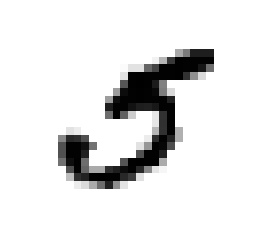

In [7]:
# now we want to display the image 
plt.imshow(some_digit_image, cmap = plt.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [8]:
# now we need to split the training and testing set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
# it is also necessary to shuffle the training set so that every digit will be trained homogeneously in training and 
# cross validation 
import numpy as np
shuffled_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffled_index], y_train[shuffled_index]
# note it is not necessary to shuffle the test set

In [10]:
# training a binary classifier for detecting 5 first
# obtain list of the boolean 
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
# use a SGD classifier to do the job, SGD is good for large size dataset and capable for online learning due to
# everytime just use one data set to optimize, hence more efficient than minibatch or batch learning
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 40)
sgd_clf.fit(X_train, y_train_5)

C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=40, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [12]:
# now try to detect some digit
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [13]:
# it is more complicated to evaluate the performance of a classifier than regressor, measurements need to be understood
# measuring accuracy using cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

#
#
# this is how to do a k fold cross validation
#
#

skfolds = StratifiedKFold(n_splits = 3, random_state = 40)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    # clone classifier so that the original one leave undisturbed
    clone_clf = clone(sgd_clf)
    # split the train and test sets
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    # fit the data, predict the target and get the accuracy
    clone_clf.fit(X_train_folds, y_train_folds)
    y_prediction = clone_clf.predict(X_test_fold)
    num_correct = sum(y_prediction == y_test_fold)
    print("3 fold cross-validation accuracy:", num_correct/len(y_prediction))

C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


3 fold cross-validation accuracy: 0.09155


C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


3 fold cross-validation accuracy: 0.0966


C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


3 fold cross-validation accuracy: 0.10795


In [14]:
# now use the cross_val_score() function from the model_selection module
# essentially the same as last cell, split the train test set, fit the model, predict the target, calculate the precentage of
# correctly predicted cases

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 10, scoring = "accuracy")

C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\

array([ 0.96500583,  0.95766667,  0.96033333,  0.96533333,  0.9595    ,
        0.942     ,  0.93633333,  0.96516667,  0.96366667,  0.95632605])

In [15]:
# we want to build a 'not 5' classifier and see the accuracy
from sklearn.base import BaseEstimator
class not_5_classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool) 

In [16]:
never_5 = not_5_classifier()
# cross validate the trained model 
# conduct 5 cv and reture the accuracy for each cv
y_scores = cross_val_score(never_5, X_train, y_train_5, cv = 5, scoring = "accuracy")
y_scores

array([ 0.909     ,  0.908     ,  0.9085    ,  0.90991667,  0.91283333])

In [17]:
# if one always predict it is not 5 then around 90% accuracy due to the fact that there are around 10% ture 5 data
# hence accuracy is not a good measure for skewed data set (the number of data for each category is skewed)

In [18]:
# use corss validation to predict the right class
# confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_prediction = cross_val_predict(sgd_clf, X_train, y_train_5, cv =3)
# note the difference between cross_val_predict, which returns the predicted target
y_train_prediction

C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\

array([False, False, False, ..., False, False, False], dtype=bool)

In [19]:
y_train_prediction

array([False, False, False, ..., False, False, False], dtype=bool)

In [20]:
# use confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_prediction, y_train_5)
y_train_prediction

array([False, False, False, ..., False, False, False], dtype=bool)

In [21]:
# each row of confusion matrix represent the actual class and each column represent the predicted class. 
# precision: TP/(TP+FP), recall: TP/(TP+FN)

In [22]:
# calculate precition and recall
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_prediction)
recall_score(y_train_5, y_train_prediction)

0.88064932669249218

In [23]:
# F1 score: weighted average of precision and recall
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_prediction)

0.54851496524386745

In [24]:
# whether we prefer high precision or high recall depends on application
# 1. for an application of filtering inappropriate video for kids, we want a high precision, low recall to be safe
# 2. for an application to detect shoplifter, we want low precision, high recall to be more defensive about shop lifting actions

In [25]:
# precision and recall tradeoff. We can tune the precision and recall by tuning the threshold value 

In [26]:
# this will give the numerical value used to compare with threshold
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 199011.02399008])

In [27]:
# return decision scores instead of predictions
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")
y_scores

C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\

array([-676680.54237137, -412543.30785778, -441213.64950127, ...,
       -605365.33483495, -614886.72548863, -309535.90284773])

In [28]:
y_scores

array([-676680.54237137, -412543.30785778, -441213.64950127, ...,
       -605365.33483495, -614886.72548863, -309535.90284773])

In [29]:
from sklearn.metrics import precision_recall_curve
# precision_recall_curve return increasing precision and decreasing recall and corresponding threshold used to make decision
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
thresholds.shape

(59814,)

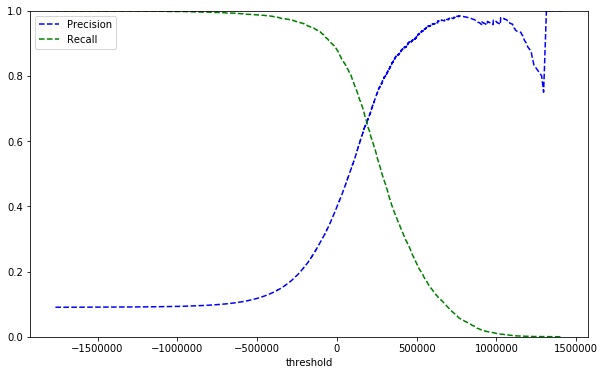

In [30]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10,6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label = "Recall")
    plt.xlabel("threshold")
    plt.legend(loc ="upper left")
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)    

Text(0.5,1,'precision-recall tradeoff curve')

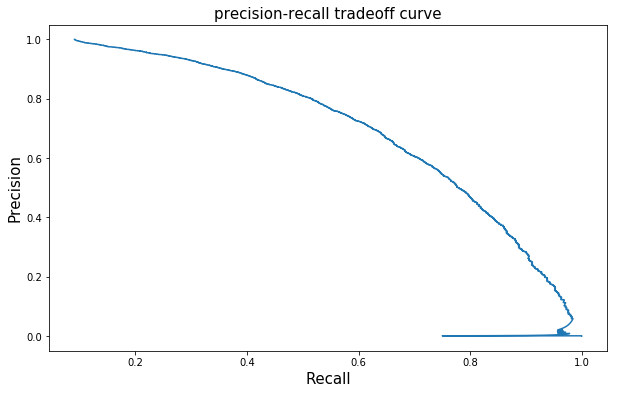

In [31]:
plt.figure(figsize = (10,6))
plt.plot(precisions, recalls)
plt.xlabel("Recall", fontsize = 15)
plt.ylabel("Precision", fontsize = 15)
plt.title("precision-recall tradeoff curve", fontsize = 15)

In [32]:
# now we can try to select which threshold value we want to obtain certain value of precision and recall
y_train_pred_90 = (y_scores > 70000)

In [33]:
# ground truth before the predicted result
precision_score(y_train_5,y_train_pred_90)

0.48861511384886153

In [34]:
recall_score(y_train_5, y_train_pred_90)

0.81940601365061794

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [36]:
# plot the ROC curve
def plot_roc(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'b--')
    plt.axis([0,1,0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

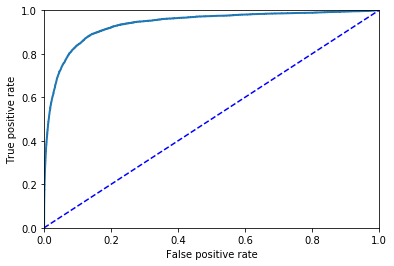

In [37]:
plot_roc(fpr, tpr)

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.93711556257195006

In [39]:
# now we try using Random Forest ensemble method to do classification
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_prediction_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3,
                                        method = "predict_proba")
# note: predict_proba is a method which output the probability of accuracy using a soft classifier
# decision_function: output the numerical value of the error between real data and prediction

In [40]:
y_scores_forest = y_prediction_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

C:\Users\Leo Du\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


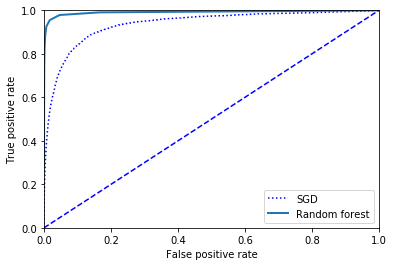

In [41]:
# now we can plot the ROC curve
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc(fpr_forest, tpr_forest, "Random forest")
plt.legend(loc = "bottom right")
plt.show()

In [42]:
# multiclass classification: transform multiclass classification to binary classification
# main techniques:
# 1. one versus rest: one class vs rest class hence binary classifier
# 2. one versus one: train binary classifier picking two classes from all classes. 

In [43]:
# sklearn detects when you try to do multiclass classification. it automatically runs OvA (SVM runs OvO)
# try using sgd classifier
sgd_clf.fit(X_train, y_train)

C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=40, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [44]:
sgd_clf.predict([some_digit])

array([ 5.])

In [45]:
# see that now the classifier has ten scores one for each class
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-257341.18446427, -335174.43725133, -485446.7892015 ,
           3408.88616739, -382900.67341353,  199011.02399008,
        -740291.67402406, -217295.14040172, -651700.88422945,
        -628685.56352998]])

In [46]:
# which score has the highest value??
np.argmax(some_digit_scores)

5

In [47]:
# when a classifier is trained, it stores the list of target classes in classes_ attribute, ordered by value
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [48]:
# we can also force to use OvO or OvA classifier
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train,y_train)

C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\

C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\

C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [49]:
ovo_clf.predict([some_digit])

array([ 5.])

In [50]:
len(ovo_clf.estimators_)

45

In [51]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [52]:
# we can get the probabilities that the classifier assigned to each instance for each class
forest_clf.predict_proba([some_digit])

array([[ 0.1,  0. ,  0. ,  0.2,  0. ,  0.7,  0. ,  0. ,  0. ,  0. ]])

In [53]:
# now we want to evaluate the prediction scores for multiclass classification 
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\

array([ 0.87982404,  0.88064403,  0.87093064])

In [54]:
# now we can try to scale the data to see whether we can have a better accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [55]:
X_train_scaled.shape

(60000, 784)

In [56]:
# now see the scores again
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\

array([ 0.90636873,  0.91439572,  0.90853628])

In [57]:
# now we have much higher cross validation accuracy due to that we scaled the training data
# we want to further evaluate the model using confusion matrix
y_train_prediction = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_matrix = confusion_matrix(y_train, y_train_prediction)

C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Leo Du\Anaconda3\lib\

In [58]:
y_train_prediction

array([ 9.,  9.,  1., ...,  1.,  2.,  0.])

In [59]:
y_train_prediction.shape

(60000,)

In [60]:
conf_matrix.shape

(10, 10)

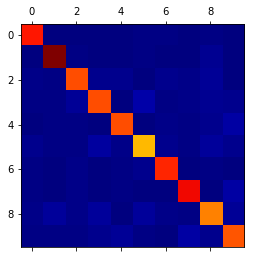

In [61]:
# plot the confusion matrix
plt.matshow(conf_matrix, cmap = plt.cm.jet)
plt.show()

In [62]:
# now we want to plot the normalized confusion matrix instead of absolute count
# axis specifies the column or row the sum is preformed
row_sums = conf_matrix.sum(axis = 1, keepdims = True)
conf_matrix_normalized = conf_matrix/row_sums
conf_matrix

array([[5735,    3,   23,   10,   12,   43,   45,   10,   39,    3],
       [   2, 6473,   49,   24,    5,   42,    7,   16,  114,   10],
       [  60,   39, 5358,   89,   81,   23,   89,   56,  148,   15],
       [  47,   44,  137, 5350,    1,  239,   39,   56,  120,   98],
       [  24,   27,   39,    8, 5346,    9,   52,   36,   81,  220],
       [  82,   40,   41,  187,   73, 4605,  101,   32,  159,  101],
       [  36,   24,   56,    2,   39,   93, 5616,    7,   45,    0],
       [  26,   21,   66,   25,   48,   13,    4, 5824,   14,  224],
       [  56,  162,   68,  165,   10,  165,   61,   29, 4986,  149],
       [  46,   30,   27,   81,  144,   32,    2,  218,   76, 5293]], dtype=int64)

In [63]:
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

In [64]:
conf_matrix_normalized.astype(np.float16)

array([[  9.68261719e-01,   5.06401062e-04,   3.88336182e-03,
          1.68800354e-03,   2.02560425e-03,   7.25936890e-03,
          7.59887695e-03,   1.68800354e-03,   6.58416748e-03,
          5.06401062e-04],
       [  2.96592712e-04,   9.59960938e-01,   7.26699829e-03,
          3.55911255e-03,   7.41481781e-04,   6.22940063e-03,
          1.03855133e-03,   2.37274170e-03,   1.69067383e-02,
          1.48296356e-03],
       [  1.00708008e-02,   6.54602051e-03,   8.99414062e-01,
          1.49383545e-02,   1.35955811e-02,   3.86047363e-03,
          1.49383545e-02,   9.39941406e-03,   2.48413086e-02,
          2.51770020e-03],
       [  7.66754150e-03,   7.17544556e-03,   2.23388672e-02,
          8.72558594e-01,   1.63078308e-04,   3.89709473e-02,
          6.36291504e-03,   9.13238525e-03,   1.95770264e-02,
          1.59912109e-02],
       [  4.10842896e-03,   4.62341309e-03,   6.67572021e-03,
          1.36947632e-03,   9.15039062e-01,   1.54018402e-03,
          8.90350342e-03

Text(0,0.5,'true label')

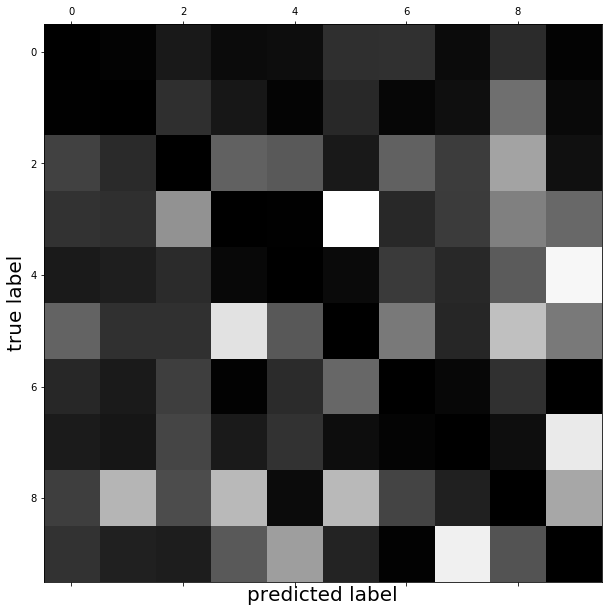

In [65]:
# plot the confusion matrix again, we can fill the diagnol value with zero to highlight the error term
np.fill_diagonal(conf_matrix_normalized, 0)
plt.figure(figsize = (10,10))
plt.matshow(conf_matrix_normalized, cmap = plt.cm.gray, fignum = 1)
plt.xlabel("predicted label", fontsize = 20)
plt.ylabel("true label", fontsize = 20)

In [66]:
# now we can see where the major confusions are at, we can do some tricks to reduce the confusion 
# for example, we can add image processing pipeline to detect the number of closed loop for example as additional feature
# to normalized the image and reduce the effect of rotation etc in order to make the classifier more robust

In [67]:
# multi class classification
# multi label classification
# multi output classification etc

In [68]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train %2 ==1)

In [69]:
# create multilabel
from numpy import c_
y_multilabel = np.c_[y_train_large, y_train_odd]
y_multilabel

array([[ True,  True],
       [ True,  True],
       [False,  True],
       ..., 
       [False,  True],
       [False, False],
       [False, False]], dtype=bool)

In [70]:
# now train the model using KNN
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [71]:
# exercise: we want to use gridsearchcv to obtain the best 
# hyperparameters for KNN model
from sklearn.model_selection import GridSearchCV
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [72]:
# define the hyperparameters for tuning
param_grid = [
    {'weights': ["uniform","distance"],
     'n_neighbors': [3, 5, 7, 9, 13, 15],
     'algorithm': ["ball_tree", "kd_tree", "brute"]
    }
]

In [73]:
# we can run a gridsearchcv to obtain the best hyperparameters 
# but omitted here due to long computation time

In [74]:
# now we want to further increase the accuracy by making the training
# data more robust to position movement. hence enlarge dataset using
# moved version of image with same label

In [75]:
from scipy.ndimage.interpolation import shift

In [76]:
def shift_image(image, dx, dy):
    image = image.reshape((28,28))
    # cval: value used for element outside of the boundary
    shifted_image = shift(image, [dy, dx], cval= 0, mode = "constant")
    return shifted_image.reshape([-1])

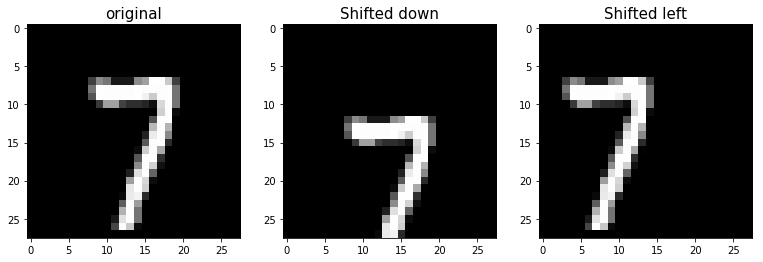

In [77]:
# try to see how this worked out
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize = (13, 13))
plt.subplot(131)
plt.title("original", fontsize = 15)
plt.imshow(image.reshape(28,28), interpolation = "nearest", cmap = "gray")
plt.subplot(132)
plt.title("Shifted down", fontsize = 15)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation = "nearest", cmap = "gray")
plt.subplot(133)
plt.title("Shifted left", fontsize = 15)
plt.imshow(shifted_image_left.reshape(28,28), interpolation = "nearest", cmap = "gray")
plt.show()

In [78]:
# now we can created augmented dataset by shifting the images
# up and down
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

In [79]:
# list and array: list can be a list of any datatype and can be
# appended easily while array is fixed size of only one type but
# might be more efficient in some numerical computation compared to list
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [80]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [81]:
# now we can see whether this manipulation increases the accuracy
knn_clf = KNeighborsClassifier()